In [ ]:
import os
import sys
import random
import warnings
import shutil

import numpy as np
import pandas as pd
import cv2

import matplotlib.pyplot as plt

from tqdm import tqdm
from itertools import chain
import skimage
from PIL import Image
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from numpy import pad
from skimage.util import crop
from skimage.measure import label
from skimage.color import rgb2gray, gray2rgb, rgb2lab, lab2rgb
from sklearn.model_selection import train_test_split

In [ ]:
!pip install opendatasets
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/thedownhill/art-images-drawings-painting-sculpture-engraving")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mennashaban
Your Kaggle Key: ··········


100%|██████████| 583M/583M [00:06<00:00, 101MB/s]


In [ ]:
training_set = '/content/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set'
dest = '/kaggle/working/train/images'

if not os.path.exists(dest):
    os.makedirs(dest)

    for dir in os.listdir(training_set):
        for img in os.listdir(os.path.join(training_set, dir)):
            org = os.path.join(training_set,dir,img)
            try:
                imread(org)
                shutil.copy(org,dest)
            except:
                print(f"the image at {org} can not be used")

the image at /content/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/engraving/249.jpg can not be used
the image at /content/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/engraving/304.jpg can not be used
the image at /content/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/engraving/356.jpg can not be used
the image at /content/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/painting/1000.jpg can not be used
the image at /content/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/painting/1400.jpg can not be used
the image at /content/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/painting/0900.jpg can not be used
the image at /content/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/painting/0350.jpg can not be used
the im

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


the image at /content/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/sculpture/200.jpg can not be used
the image at /content/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/sculpture/261.jpg can not be used
the image at /content/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/sculpture/107.jpg can not be used
the image at /content/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/sculpture/210.jpg can not be used
the image at /content/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/sculpture/190 18.59.45.jpg can not be used
the image at /content/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/sculpture/168.jpg can not be used
the image at /content/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/sculpture/374.jpg can not be us

In [ ]:
len(os.listdir('/kaggle/working/train/images'))

4746

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255,
                                   featurewise_center = True,
                                   rotation_range = 40,
                                   horizontal_flip = True)

In [ ]:
train = train_datagen.flow_from_directory("/kaggle/working/train",
                                          target_size = (256,256),
                                          batch_size = 500,
                                          shuffle = True)

Found 4746 images belonging to 1 classes.


In [ ]:
train = train_datagen.flow_from_directory("/kaggle/working/train",
                                          target_size = (256,256),
                                          batch_size = 500,
                                          shuffle = True)

Found 4746 images belonging to 1 classes.


In [ ]:
def plot_img(img_arr, label):

    plt.figure(figsize=(5,5))

    for img, l in zip(img_arr, label):
        plt.imshow(img)
        plt.title(img.shape)
        plt.axis('off')
        plt.show()

In [ ]:
t_img, label = train.next()

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [ ]:
t_img.shape

(500, 256, 256, 3)

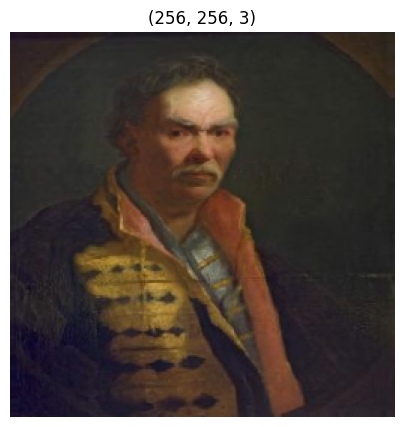

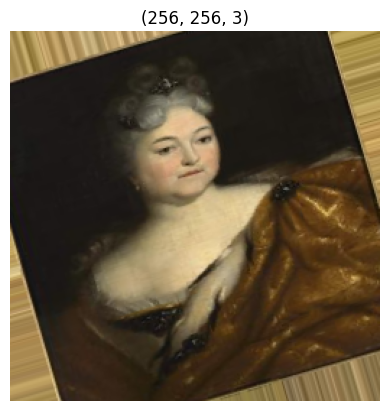

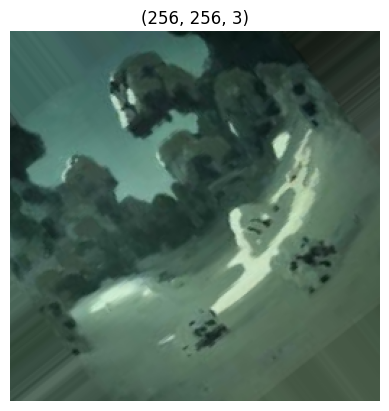

In [ ]:
plot_img(t_img[:3],label)

In [ ]:
X = []
y = []

In [ ]:
for img in t_img:
    try:
        lab = rgb2lab(img)
        X.append(lab[:,:,0])
        y.append(lab[:,:,1:]/128)

    except:
        print("error")

In [ ]:
x_train = np.array(X)
x_train = np.expand_dims(x_train, axis = len(x_train.shape))

y_train = np.array(y)

In [ ]:
x_train.shape, y_train.shape

((500, 256, 256, 1), (500, 256, 256, 2))

In [ ]:
from keras.layers import Conv2D, MaxPool2D, UpSampling2D, Input, LeakyReLU
from keras.models import Sequential

In [ ]:
#encoder
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', padding='same',strides=2,input_shape = (256,256,1)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same',strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same',strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

#decoder
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3,3), activation=LeakyReLU(alpha=0.01), padding='same'))
model.add(UpSampling2D((2, 2)))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 conv2d_22 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_23 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 conv2d_24 (Conv2D)          (None, 64, 64, 256)       295168    
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 256)       590080    
                                                                 
 conv2d_26 (Conv2D)          (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 512)      

In [ ]:
model.compile(optimizer='adam',metrics =['acc'], loss='mse')

In [ ]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, steps_per_epoch = x_train.shape[0]//32, verbose = 1)

Epoch 1/30
15/15 [==============================] - 29s 291ms/step - loss: 0.7977 - acc: 0.6551
Epoch 2/30
15/15 [==============================] - 11s 291ms/step - loss: 0.0136 - acc: 0.7729
Epoch 3/30
15/15 [==============================] - 4s 285ms/step - loss: 0.0131 - acc: 0.7735
Epoch 4/30
15/15 [==============================] - 4s 284ms/step - loss: 0.0118 - acc: 0.7727
Epoch 5/30
15/15 [==============================] - 4s 282ms/step - loss: 0.0106 - acc: 0.7901
Epoch 6/30
15/15 [==============================] - 4s 283ms/step - loss: 0.0112 - acc: 0.7684
Epoch 7/30
15/15 [==============================] - 4s 287ms/step - loss: 0.0102 - acc: 0.7722
Epoch 8/30
15/15 [==============================] - 4s 285ms/step - loss: 0.0106 - acc: 0.7752
Epoch 9/30
15/15 [==============================] - 4s 285ms/step - loss: 0.0102 - acc: 0.7725
Epoch 10/30
15/15 [==============================] - 4s 289ms/step - loss: 0.0101 - acc: 0.7832
Epoch 11/30
15/15 [============================

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
